#  Analysis and visulaiztion on data analysis jobs and salary
### created by : Ahmed monged 

## Investigation Overview

> In this investigation, I wanted to look at the characteristics that affect the salary and rating of data analysis jobs in the US

## Dataset Overview

>The Ford GoBike System dataset contains information about individual rides made in a bike-sharing system it consists of more than 183k row and 16 columns which contains information about each trip.

In [226]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [172]:
df = pd.read_csv('DataAnalyst.csv')

#### Assesing through data

In [173]:
# remove columne index
df = df.drop('Unnamed: 0', 1)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


In [175]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


## Findings 
#### > data type of some columns need to be changed to a suitable type
#### > some columns values have unnecessary word and letters (need to be removed)
#### > adjust and extract salary data (from 1 column to 2 columns)
#### > replace empty values with Nan to make the data acceptable to analysis
### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - 

## Data cleaning

In [176]:
# convert -1 to unknown for all values
for col in df.columns :
    df[col] = df[col].replace(-1,'Unknown')
    df[col] = df[col].replace('-1','Unknown')

####  Removing unwanted letter and words

In [177]:
df['Salary Estimate'] 

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2253, dtype: object

In [178]:
# removeing the "(Glassdoor est.)" part
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x[:-len('(Glassdoor est.)')])

In [179]:
# create two columns for the start and end salary
df[['start_salary','end_salary']] = df['Salary Estimate'].str.split('-',expand=True)

In [180]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,start_salary,end_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,TRUE,$37K,$66K


#### adjusting values in columns

In [181]:
# function for replacing values and converting the type of data
def convert(col_name,old_value,new_value,type):
    df[col_name] = df[col_name].replace(old_value,new_value)
    df[col_name].astype(type)

In [182]:
# replace 'unknown' with 0 and type to integer
convert('Founded','Unknown',0,'int')

# removeing the "employees" part from size col
df['Size'] = df['Size'].apply(lambda x: x[:-len('employees')])

# removing non degit letters
df['Size'] = df['Size'].replace('\D',' ',regex=True)

# removing spaces
df['Size'] = df['Size'].apply(lambda x: x.strip())

# replace spaces with'-'
df['Size'] = df['Size'].replace('\D','-',regex=True)

#splitting the '-'
df['Size'] = df['Size'].apply(lambda x: x.split('-'))

# selecting the last number as an indecator for the company size
df['Size'] = df['Size'].apply(lambda x: x[-1])

In [183]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,start_salary,end_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,TRUE,$37K,$66K
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,Unknown,$37K,$66K
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,Unknown,$37K,$66K
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Unknown,Unknown,$37K,$66K
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,$37K,$66K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",200,0,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,Unknown,Unknown,$78K,$104K
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",Unknown,$78K,$104K
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K,"Title: Technical Business Analyst (SQL, Data a...",Unknown,Spiceorb,"Denver, CO",Unknown,,0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,$78K,$104K
2251,"Data Analyst 3, Customer Experience",$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",500,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),Unknown,Unknown,$78K,$104K


In [184]:
convert('Size','',0,'int')
df.Size.value_counts()

10000    472
200      421
5000     348
50       347
500      249
1000     211
0        205
Name: Size, dtype: int64

In [185]:
# adjust company names
df['Company Name'] = df['Company Name'].apply(lambda z: str(z).split('\n')[0])

In [186]:
# deleting salary estimate column 
df.drop('Salary Estimate',axis=1,inplace=True)

In [187]:
# using convert function
convert('Rating','Unknown',0,'float')

In [188]:
df[df.start_salary=='']

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,start_salary,end_salary
2149,Configuration/Data Management Analyst III,Job Description\nPosition Title: Configuration...,4.4,Protingent,"Kent, WA","Bellevue, WA",200,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),Unknown,Unknown,,None


In [189]:
# removing row 2149 as it is useless
df.drop(2149,axis=0,inplace=True)

In [190]:
df.start_salary.value_counts()

$42K     118
$37K     118
$57K     111
$43K      93
$35K      91
$60K      91
$51K      89
$46K      88
$41K      86
$53K      81
$73K      61
$50K      60
$65K      57
$47K      57
$55K      56
$48K      49
$49K      46
$44K      40
$30K      38
$58K      31
$98K      30
$64K      30
$27K      30
$97K      30
$69K      30
$59K      30
$29K      29
$26K      29
$38K      29
$113K     29
$77K      29
$67K      29
$24K      29
$110K     29
$28K      28
$89K      28
$82K      28
$34K      28
$40K      28
$74K      28
$99K      28
$54K      28
$76K      28
$93K      25
$45K      22
$63K      20
$84K      18
$68K      16
$78K      15
$32K       4
$31K       4
$36K       3
Name: start_salary, dtype: int64

In [191]:
df.end_salary.value_counts()

$76K      116
$86K      100
$66K       90
$78K       80
$93K       79
$87K       76
$88K       68
$104K      68
$67K       62
$74K       62
$68K       59
$94K       58
$103K      58
$52K       58
$132K      58
$82K       57
$116K      48
$127K      44
$81K       32
$70K       31
$124K      31
$114K      30
$85K       30
$129K      30
$42K       30
$113K      30
$69K       30
$110K      30
$53K       30
$44K       29
$92K       29
$47K       29
$48K       29
$38K       29
$190K      29
$122K      28
$120K      28
$151K      28
$91K       28
$45K       28
$61K       28
$123K      28
$102K      28
$178K      28
$75K       28
$100K      27
$101K      27
$99K       26
$159K      25
$96K       22
$72K       19
$89K       18
$90K       18
$112K      18
$54K        8
$56K        4
$63K        4
$59K        4
$77K        3
Name: end_salary, dtype: int64

In [192]:
# adjusting values to be acceptable to change type
df.start_salary = df.start_salary.apply(lambda x:x.replace('$',''))
df.end_salary = df.end_salary.apply(lambda x:x.replace('$',''))
df.start_salary = df.start_salary.apply(lambda x:x.replace('K','000'))
df.end_salary = df.end_salary.apply(lambda x:x.replace('K','000'))

In [193]:
df.head(5)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,start_salary,end_salary
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,TRUE,37000,66000
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,Unknown,37000,66000
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,Unknown,37000,66000
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Unknown,Unknown,37000,66000
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,37000,66000


#### choosing a suitable type for each column

In [194]:
df.Size=df.Size.astype('int')
df.Rating=df.Rating.astype('float')
df.start_salary=df.start_salary.astype('int')
df.end_salary=df.end_salary.astype('int')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2252 non-null   object 
 1   Job Description    2252 non-null   object 
 2   Rating             2252 non-null   float64
 3   Company Name       2252 non-null   object 
 4   Location           2252 non-null   object 
 5   Headquarters       2252 non-null   object 
 6   Size               2252 non-null   int32  
 7   Founded            2252 non-null   int64  
 8   Type of ownership  2252 non-null   object 
 9   Industry           2252 non-null   object 
 10  Sector             2252 non-null   object 
 11  Revenue            2252 non-null   object 
 12  Competitors        2252 non-null   object 
 13  Easy Apply         2252 non-null   object 
 14  start_salary       2252 non-null   int32  
 15  end_salary         2252 non-null   int32  
dtypes: float64(1), int32(3),

In [196]:
df.describe()

,Rating,Size,Founded,start_salary,end_salary
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000
mean,3.280861,3062.544405,1398.548401,54266.873890,89979.129663
std,1.369089,3947.062414,901.585331,19575.374706,29315.605358
min,0.000000,0.000000,0.000000,24000.000000,38000.000000
25%,3.100000,200.000000,0.000000,41000.000000,70000.000000
50%,3.600000,500.000000,1979.000000,50000.000000,87000.000000
75%,4.000000,5000.000000,2002.000000,64000.000000,104000.000000
max,5.000000,10000.000000,2019.000000,113000.000000,190000.000000


In [197]:
# function for replacing 0 with nan value
def nan_value(col,old_val,new_val=np.nan):
    df[col] = df[col].replace(old_val,new_val)

In [198]:
# applying the nan_value Function
nan_value('Rating',0)
nan_value('Founded',0)
nan_value('start_salary',0)
nan_value('end_salary',0)
nan_value('Sector','Unknown')

In [199]:
df['state'] = df['Location'].apply(lambda x:x[-2:])

In [200]:
df.head(32)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,start_salary,end_salary,state
0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",500,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,TRUE,37000,66000,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,Unknown,37000,66000,NY
2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",5000,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,Unknown,37000,66000,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",500,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Unknown,Unknown,37000,66000,NY
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",1000,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,37000,66000,NY
5,Data Analyst,About Cubist\nCubist Systematic Strategies is ...,3.9,Point72,"New York, NY","Stamford, CT",5000,2014.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,Unknown,Unknown,37000,66000,NY
6,Business/Data Analyst (FP&A),Two Sigma is a different kind of investment ma...,4.4,Two Sigma,"New York, NY","New York, NY",5000,2001.0,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,Unknown,Unknown,37000,66000,NY
7,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",500,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE,37000,66000,NY
8,Data Analyst,The Data Analyst is an integral member of the ...,4.0,DMGT,"New York, NY","London, United Kingdom",10000,1896.0,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",Unknown,37000,66000,NY
9,"Data Analyst, Merchant Health",About Us\n\nRiskified is the AI platform power...,4.4,Riskified,"New York, NY","New York, NY",1000,2013.0,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",Unknown,37000,66000,NY


### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - - - - - - - - - - - - - - - 

## Data visulaization

<AxesSubplot:>

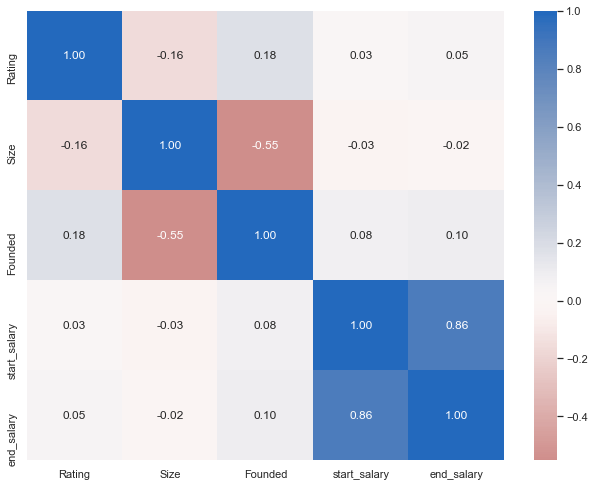

In [201]:
sb.heatmap(df.corr(),annot=True,fmt='.2f',
          cmap='vlag_r',center=0)

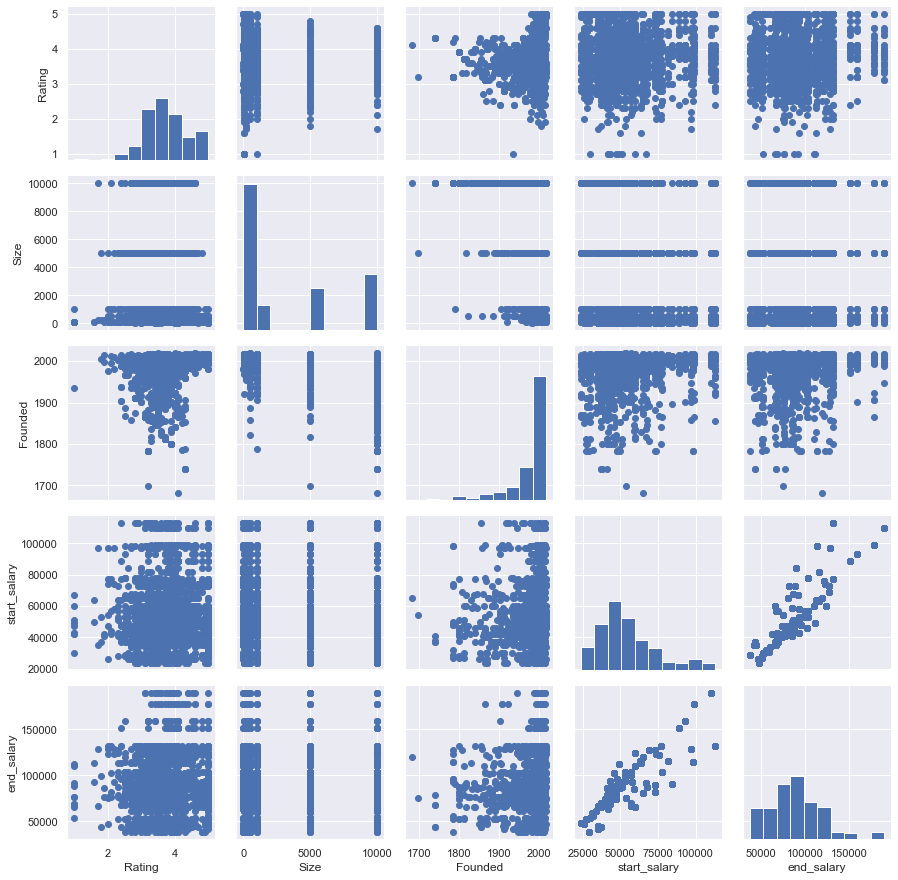

In [202]:
g= sb.PairGrid(data=df,vars=['Rating','Size','Founded','start_salary','end_salary'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [203]:
df.start_salary.value_counts()

42000     118
37000     118
57000     111
43000      93
60000      91
35000      91
51000      89
46000      88
41000      86
53000      81
73000      61
50000      60
47000      57
65000      57
55000      56
48000      49
49000      46
44000      40
30000      38
58000      31
97000      30
69000      30
64000      30
27000      30
98000      30
59000      30
26000      29
67000      29
24000      29
110000     29
38000      29
29000      29
113000     29
77000      29
82000      28
99000      28
74000      28
54000      28
76000      28
34000      28
89000      28
40000      28
28000      28
93000      25
45000      22
63000      20
84000      18
68000      16
78000      15
31000       4
32000       4
36000       3
Name: start_salary, dtype: int64

In [204]:
base_color = sb.color_palette()[0]

In [205]:
bins = np.arange(25000,df.start_salary.max()+3000,3000)

In [206]:
np.arange(20000,130000, 10000)

array([ 20000,  30000,  40000,  50000,  60000,  70000,  80000,  90000,
       100000, 110000, 120000])

In [207]:
x = [ 2,3,4]
labels = ['2k','3k','4k']

## Distribution of salary(start and end salary)
> we found that the start salary starts at an average of 35k to 63k us dollars and the end salary begins with an average of 60k to 130k US dollar

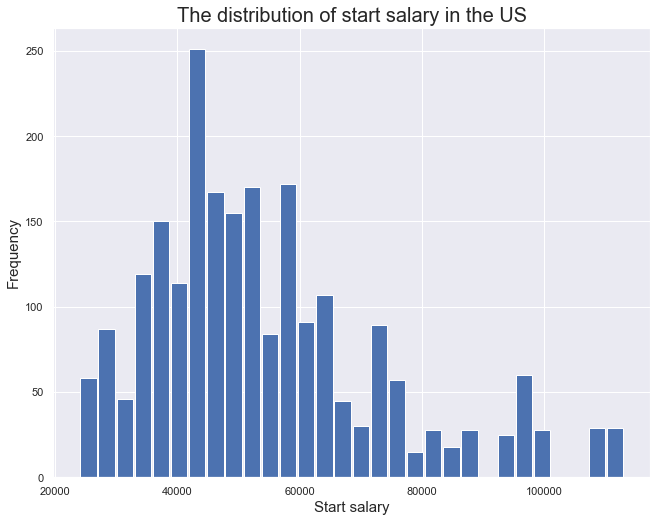

In [269]:
plt.hist(data=df,x='start_salary',bins=30,rwidth=.9);
plt.title('The distribution of start salary in the US',fontsize=20);
plt.xlabel('Start salary',fontsize=15);
plt.ylabel('Frequency',fontsize=15);

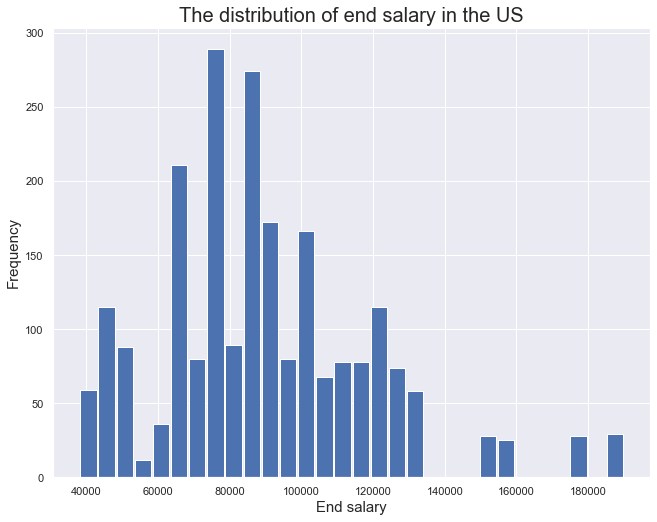

In [270]:
plt.hist(data=df,x='end_salary',bins=30,rwidth=.9);
plt.title('The distribution of end salary in the US',fontsize=20);
plt.xlabel('End salary',fontsize=15);
plt.ylabel('Frequency',fontsize=15);

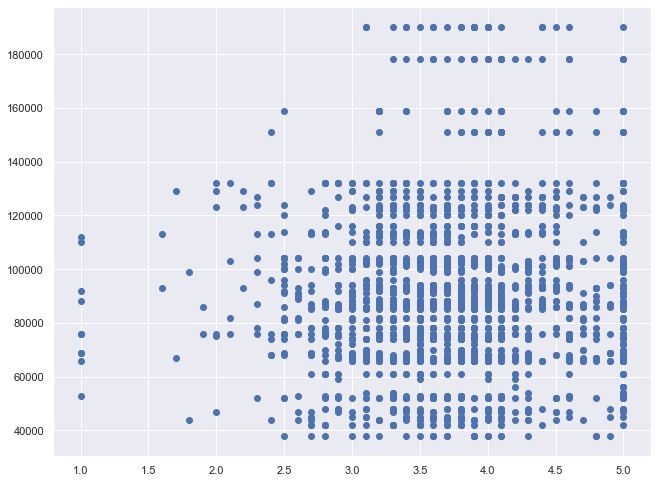

In [213]:
plt.scatter(data=df,x='Rating',y='end_salary');

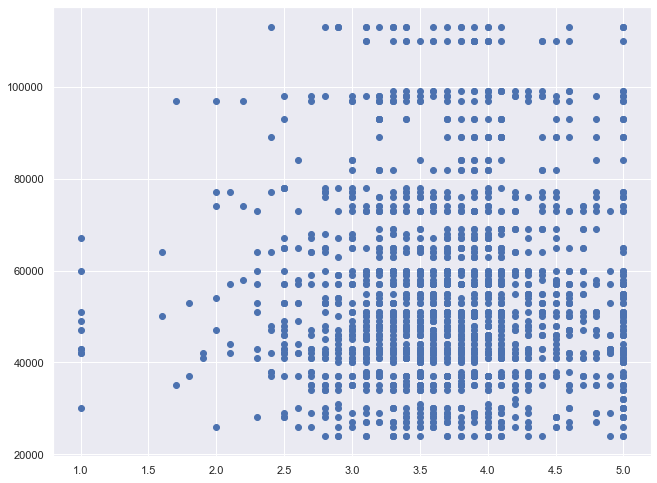

In [214]:
plt.scatter(data=df,x='Rating',y='start_salary')

## Relation between start and end salary
> we found that the companies that have a high start salary tend to be one of the companies that provide a high paid end salary per year in the US

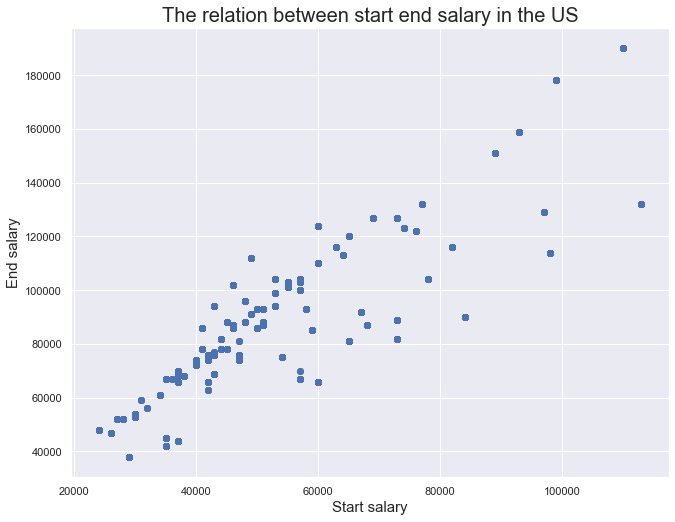

In [271]:
plt.scatter(data=df,x='start_salary',y='end_salary');
plt.title('The relation between start end salary in the US',fontsize=20);
plt.xlabel('Start salary',fontsize=15);
plt.ylabel('End salary',fontsize=15);

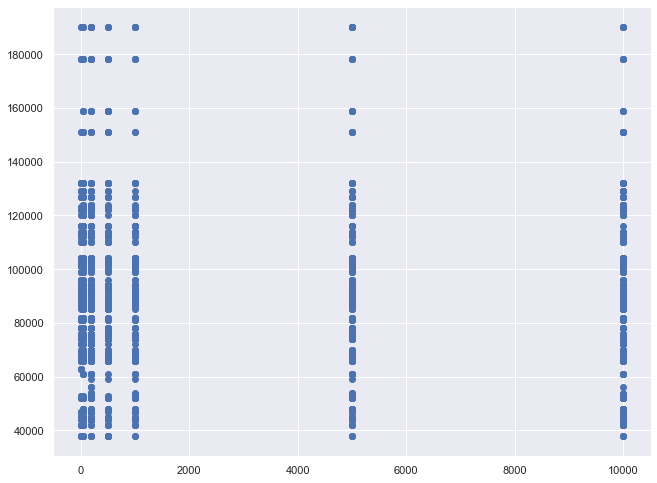

In [216]:
plt.scatter(data=df,x='Size',y='end_salary')

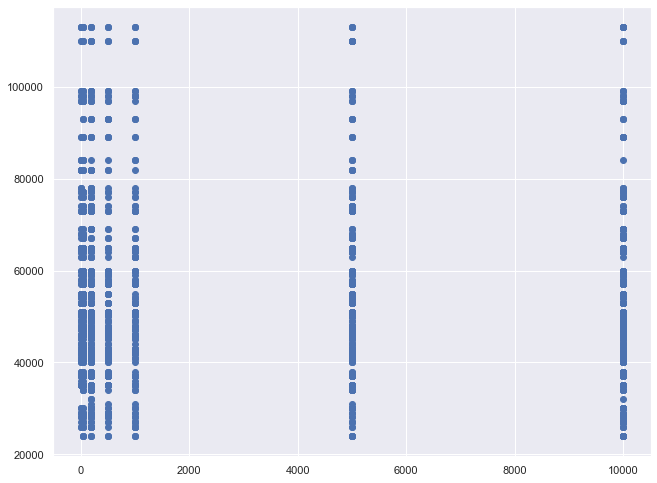

In [217]:
plt.scatter(data=df,x='Size',y='start_salary')

## salary between US states

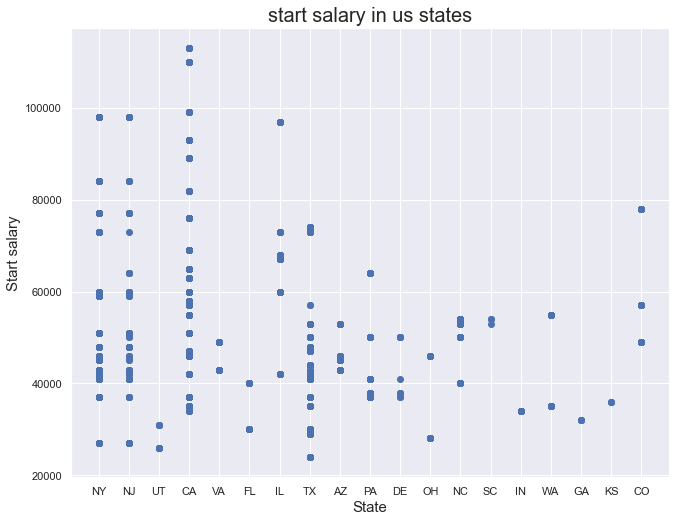

In [272]:
plt.scatter(data=df,x='state',y='start_salary')
plt.title('start salary in us states',fontsize=20);
plt.xlabel('State',fontsize=15);
plt.ylabel('Start salary',fontsize=15);

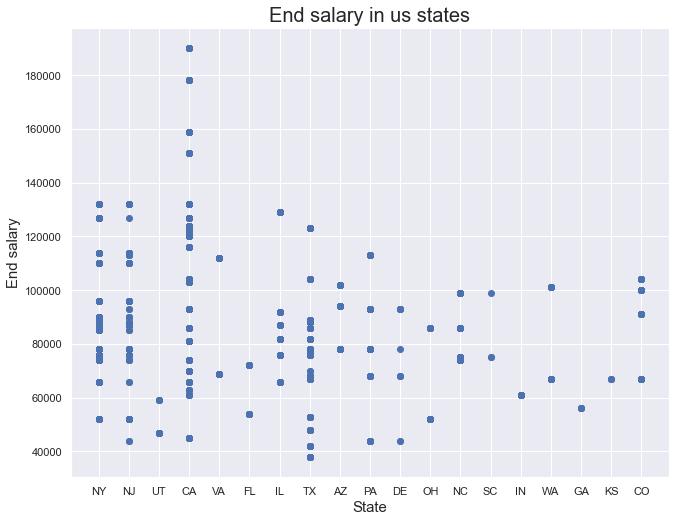

In [273]:
plt.scatter(data=df,x='state',y='end_salary')
plt.title('End salary in us states',fontsize=20);
plt.xlabel('State',fontsize=15);
plt.ylabel('End salary',fontsize=15);

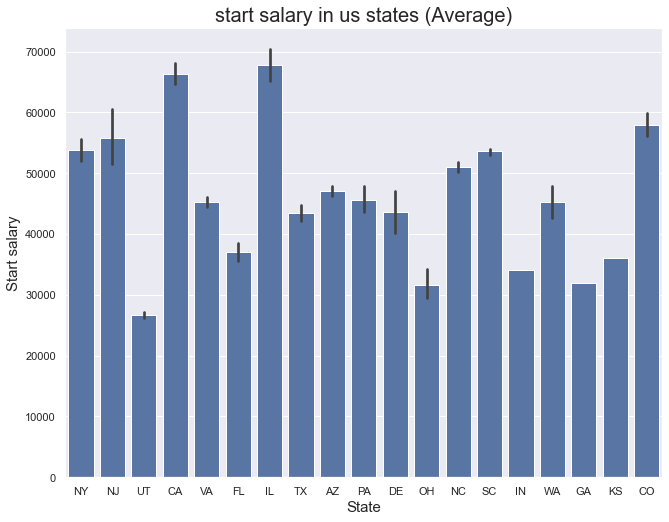

In [274]:
sb.barplot(x=df.state,y=df.start_salary,color=base_color);
plt.title('start salary in us states (Average)',fontsize=20);
plt.xlabel('State',fontsize=15);
plt.ylabel('Start salary',fontsize=15);

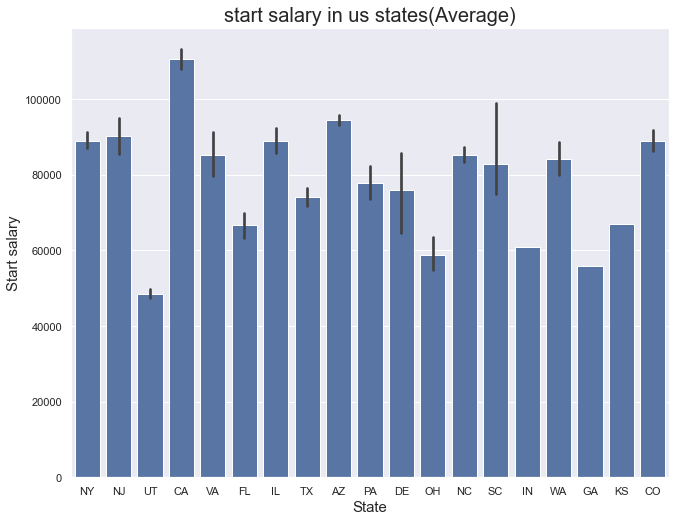

In [275]:
sb.barplot(x=df.state,y=df.end_salary,color=base_color);
plt.title('start salary in us states(Average)',fontsize=20);
plt.xlabel('State',fontsize=15);
plt.ylabel('Start salary',fontsize=15);

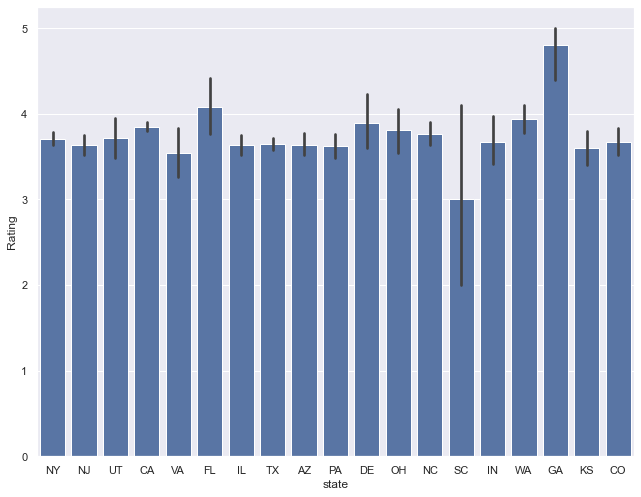

In [222]:
sb.barplot(x=df.state,y=df.Rating,color=base_color);

## Relation between sector and salary

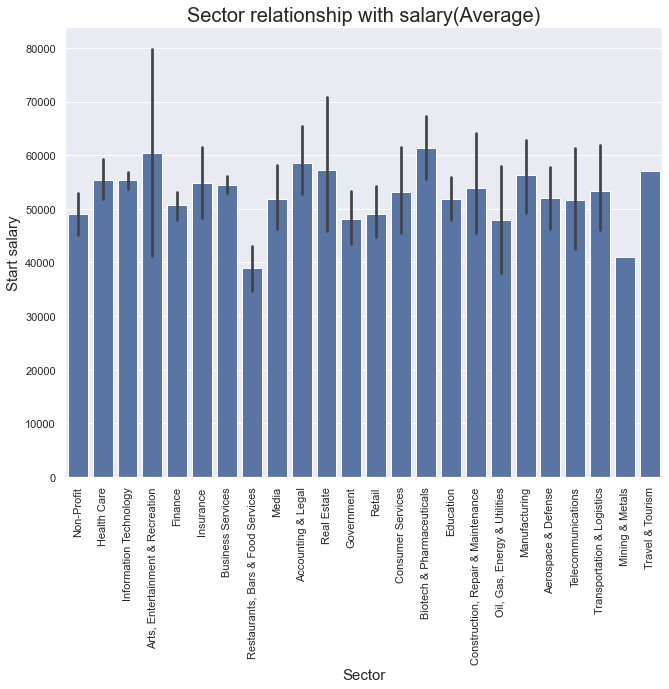

In [277]:
sb.barplot(x=df.Sector,y=df.start_salary,color=base_color);
sb.set(rc={'figure.figsize':(10.7,8.27)}) 
plt.xticks(rotation=90);
plt.title('Sector relationship with salary(Average)',fontsize=20);
plt.xlabel('Sector',fontsize=15);
plt.ylabel('Start salary',fontsize=15);

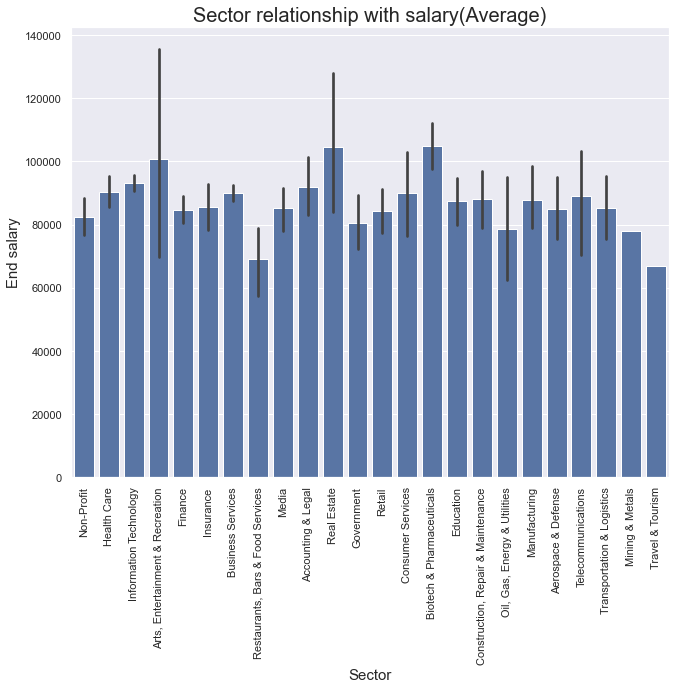

In [276]:
sb.barplot(x=df.Sector,y=df.end_salary,color=base_color);
sb.set(rc={'figure.figsize':(10.7,8.27)}) 
plt.xticks(rotation=90);
plt.title('Sector relationship with salary(Average)',fontsize=20);
plt.xlabel('Sector',fontsize=15);
plt.ylabel('End salary',fontsize=15);

In [235]:
df_plot = df.groupby(['Rating']).mean()

In [253]:
df_plot['Rating'] = df_plot.index

In [254]:
df_plot

,Size,Founded,start_salary,end_salary,Rating
Rating,,,,,
1.0,145.000000,1935.000000,47400.000000,81100.000000,1.0
1.6,50.000000,NaN,57000.000000,103000.000000,1.6
1.7,5100.000000,NaN,66000.000000,98000.000000,1.7
1.8,2600.000000,2006.000000,45000.000000,71500.000000,1.8
1.9,125.000000,2006.000000,41500.000000,81000.000000,1.9
2.0,1133.333333,1977.000000,62500.000000,97000.000000,2.0
2.1,2887.500000,2003.500000,55000.000000,98250.000000,2.1
2.2,2016.666667,1994.500000,76333.333333,115000.000000,2.2
2.3,1305.555556,2002.500000,52222.222222,95555.555556,2.3


## Relationship between rating of comapnies and salary

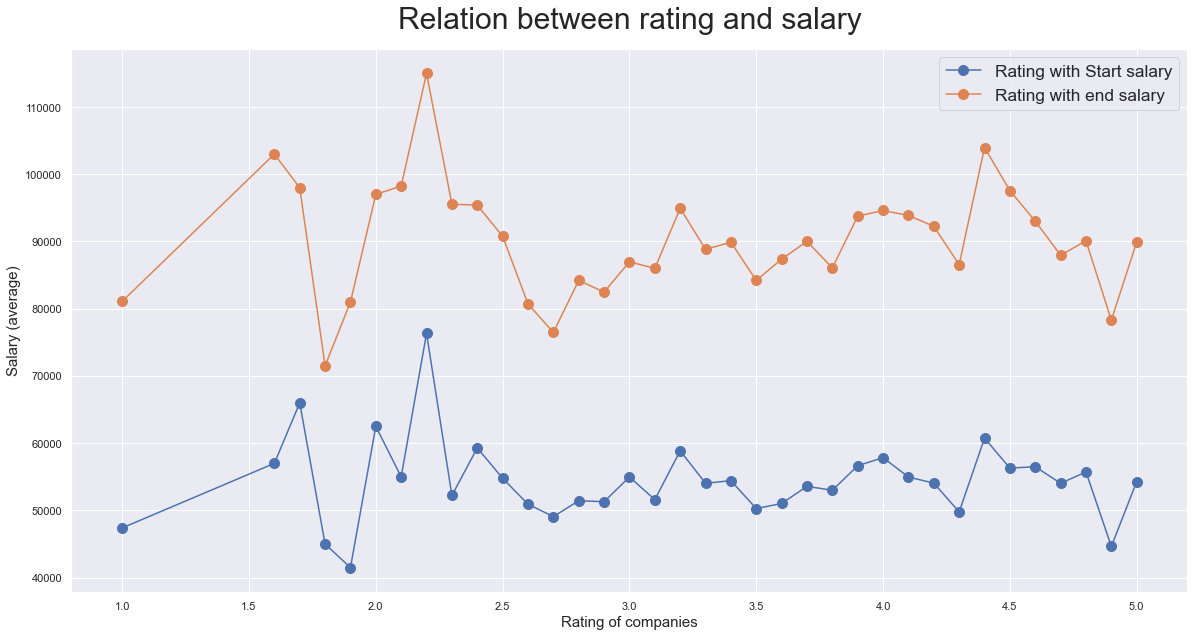

In [281]:
plt.figure(figsize = (20, 10))
plt.title('Relation between rating and salary', fontsize = 30, pad = 20)
plt.plot(df_plot['Rating'], df_plot['start_salary'], label = 'Rating with Start salary', marker = '.', markersize = 20)
plt.plot(df_plot['Rating'], df_plot['end_salary'], label = 'Rating with end salary', marker = '.', markersize = 20)
plt.legend(fontsize = 'x-large')
plt.xlabel('Rating of companies',fontsize=15);
plt.ylabel('Salary (average)',fontsize=15);
plt.show()